#Tarea sobre redes densas

**Alumno: Jesús Priego Morales (316132949)**


<font size=5 font color="blue">
<i>Paqueterías utilizadas</i>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

##Análisis y arreglo del Dataframe

In [ ]:
#Accedemos al dataset guardado en nuestro drive
renuncias=pd.read_csv('/content/drive/MyDrive/Tareas_DeepLearning/renuncias.csv')

In [ ]:
#revolvemos todas las columnas para evitar posibles problemas de distribución de los datos
renuncias=renuncias.sample(frac=1).reset_index(drop=True)
renuncias

,nivel_satisfaccion,ultima_evaluacion,numero_de_proyecto,promedio_horas_mensuales,tiempo_en_la_compania,accidente_de_trabajo,renuncia,promocion_ultimos_5anios,ventas,salario
0,0.37,0.54,2,131,3,1,1,0,hr,medium
1,0.34,0.60,4,154,2,0,0,0,hr,low
2,0.61,0.88,5,134,4,0,0,0,technical,low
3,0.66,0.73,3,244,3,0,0,0,support,medium
4,0.27,0.96,3,255,4,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.91,0.77,3,195,7,0,0,0,sales,medium
14995,0.93,0.65,4,258,3,0,0,0,support,medium
14996,0.80,0.95,4,274,5,0,1,0,sales,low
14997,0.30,0.64,2,137,3,0,0,0,management,high


In [ ]:
renuncias.ventas.unique()

array(['hr', 'technical', 'support', 'sales', 'accounting', 'management',
       'RandD', 'IT', 'product_mng', 'marketing'], dtype=object)

In [ ]:
renuncias.salario.unique()

array(['medium', 'low', 'high'], dtype=object)

In [ ]:
#Se observa que hay variuables categóricas, por lo cual haremos un one-hot
#esto para no darle más peso a algunas categorías que a otras
renuncias= pd.get_dummies(renuncias, columns=['ventas','salario'])
renuncias

,nivel_satisfaccion,ultima_evaluacion,numero_de_proyecto,promedio_horas_mensuales,tiempo_en_la_compania,accidente_de_trabajo,renuncia,promocion_ultimos_5anios,ventas_IT,ventas_RandD,...,ventas_hr,ventas_management,ventas_marketing,ventas_product_mng,ventas_sales,ventas_support,ventas_technical,salario_high,salario_low,salario_medium
0,0.37,0.54,2,131,3,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0.34,0.60,4,154,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0.61,0.88,5,134,4,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.66,0.73,3,244,3,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0.27,0.96,3,255,4,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.91,0.77,3,195,7,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
14995,0.93,0.65,4,258,3,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
14996,0.80,0.95,4,274,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
14997,0.30,0.64,2,137,3,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
#Separamos el data frame en los datos de entrenamiento y los datos de prueba
train_data=renuncias[:9000]
val_data=renuncias[9000:11999]
test_data=renuncias[11999:]

In [ ]:
train_data.shape

(9000, 21)

In [ ]:
val_data.shape

(2999, 21)

In [ ]:
test_data.shape

(3000, 21)

In [ ]:
#Ahora separamos las etiquetas y los vectores de características  de cada conjunto de datos
train_labels=train_data['renuncia']
train_data=train_data.drop('renuncia',axis=1)
val_labels=val_data['renuncia']
val_data=val_data.drop('renuncia',axis=1)
test_labels=test_data['renuncia']
test_data=test_data.drop('renuncia',axis=1)

##Preparación de los datos

In [ ]:
#Normalizamos cada conjunto por separado
train_mean=train_data.mean(axis=0)
train_data -= train_mean
train_std = train_data.std(axis=0)
train_data /= train_std

val_mean=val_data.mean(axis=0)
val_data -= val_mean
val_std = val_data.std(axis=0)
val_data /= val_std

test_mean=test_data.mean(axis=0)
test_data -= test_mean
test_std = test_data.std(axis=0)
test_data /= test_std

##Construcción del modelo

In [ ]:
#Contruimos las capas de la red, la última capa tiene sólo una neurona con la función sigmoid
#pues se trata de una clasificación binaria
model = keras.Sequential([
    layers.Input((None,20)),
    #layers.Dense(128, activation="relu"),
    #layers.Dropout(0.50),
    layers.Dense(128, activation="relu"),
    #Debido a que la función de pérdida presentaba estancamiento, se decidió hacer dropout
    layers.Dropout(0.50),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.50),
    layers.Dense(1, activation="sigmoid")
])

##Compilado del modelo y definición de la métrica

In [ ]:
#Se define el optimizador, la función de pérdida y la métrica, la cual será el accuracy
#Se decidió usar el optimizador con aplicaciones más amplias (Adam)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              #La función de pérdida es la que comunmente se usa en clasificadores binarios
              loss=keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])

##Entrenamiento del modelo

In [ ]:
#Se definen las épocas, el tamaño del batch y se introducen los datos de validación y de entrenamiento
history = model.fit(train_data,train_labels,
                    epochs=78,
                    batch_size=510,
                    validation_data=(val_data, val_labels))

Epoch 1/78
18/18 [==============================] - 1s 20ms/step - loss: 0.5799 - accuracy: 0.7222 - val_loss: 0.4578 - val_accuracy: 0.7696
Epoch 2/78
18/18 [==============================] - 0s 9ms/step - loss: 0.4804 - accuracy: 0.7808 - val_loss: 0.3955 - val_accuracy: 0.8339
Epoch 3/78
18/18 [==============================] - 0s 8ms/step - loss: 0.4285 - accuracy: 0.7989 - val_loss: 0.3492 - val_accuracy: 0.8439
Epoch 4/78
18/18 [==============================] - 0s 9ms/step - loss: 0.3924 - accuracy: 0.8173 - val_loss: 0.3096 - val_accuracy: 0.8630
Epoch 5/78
18/18 [==============================] - 0s 9ms/step - loss: 0.3573 - accuracy: 0.8423 - val_loss: 0.2737 - val_accuracy: 0.8856
Epoch 6/78
18/18 [==============================] - 0s 10ms/step - loss: 0.3292 - accuracy: 0.8602 - val_loss: 0.2440 - val_accuracy: 0.9030
Epoch 7/78
18/18 [==============================] - 0s 9ms/step - loss: 0.3030 - accuracy: 0.8736 - val_loss: 0.2214 - val_accuracy: 0.9163
Epoch 8/78
18/18 [

##Gráficas de validación y entrenamiento

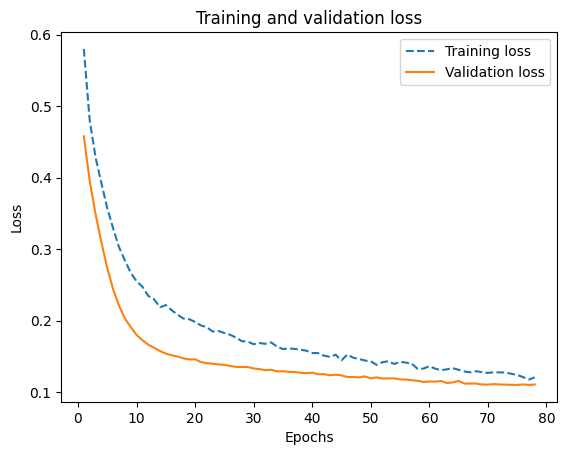

In [ ]:
#Graficamos la función de pérdida de la validación y entrenamiento
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "--", label="Training loss")
plt.plot(epochs, val_loss, "-", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

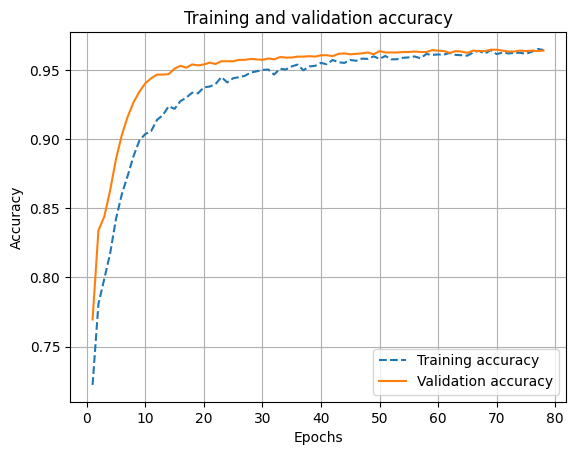

In [ ]:
#Graficamos el accuracy para los datos de entrenamiento y la validación
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "--", label="Training accuracy")
plt.plot(epochs, val_acc, "-", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()

##Predicciones en los datos de prueba

In [ ]:
predicciones=model.predict(test_data)

94/94 [==============================] - 0s 3ms/step


In [ ]:
out=predicciones.round().astype(int)
out

array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [ ]:
test_labels

11999    0
12000    0
12001    0
12002    0
12003    0
        ..
14994    0
14995    0
14996    1
14997    0
14998    0
Name: renuncia, Length: 3000, dtype: int64

In [ ]:
model.evaluate(test_data, test_labels)

94/94 [==============================] - 0s 3ms/step - loss: 0.1057 - accuracy: 0.9703


[0.10568878054618835, 0.9703333377838135]

##Observaciones



*   **Se jugaron con las variables y se pudo observar que el mejor desempeño se alzanzaba con sólo 2 capas ocultas de 128 neuronas**
*   **Al dejar las puras capas ocultas, se notaba que la función de pérdida no decrecía más abajo de 0.15, ésto se arreglí aplicando un Dropout del 50% de neuronas**
*   **Se logró un accuracy de hasta 97% en los datos de prueba con una pérdida de 0.1057**
*   **Se jugó con el número de épocas, ésto para poder verificar si el modelo podría ser sobre-entrenado, lo cual confirmamos**
*   **Dado lo anterior, dejamos el número de épocas en 78 pues permitía que el modelo se entrenara bien sin que se sobre-entrene**

